In [1]:
import json
import urllib.request
import base64
import time
import pandas as pd
from datetime import datetime
from hdfs import Client
import os

def label_retard_pt_stat (row):
    if row['timestamps_eibt']!='None' and row['timestamps_eldt']!='None' and row['timestamps_aibt']!='None' and  row['timestamps_aldt']!='None':
            timestamps_eibt=datetime.strptime(row['timestamps_eibt'], "%Y-%m-%d %H:%M:%S")
            timestamps_aibt=datetime.strptime(row['timestamps_aibt'], "%Y-%m-%d %H:%M:%S")
            if timestamps_aibt<timestamps_eibt:
                return 0
            else:
                return int((timestamps_aibt-timestamps_eibt).seconds/60)
    else:
        return -1

def label_retart_terissage(row):
    if row['timestamps_eibt']!='None' and row['timestamps_eldt']!='None' and row['timestamps_aibt']!='None' and  row['timestamps_aldt']!='None':
            timestamps_eldt=datetime.strptime(row['timestamps_eldt'], "%Y-%m-%d %H:%M:%S")
            timestamps_aldt=datetime.strptime(row['timestamps_aldt'], "%Y-%m-%d %H:%M:%S")
            if timestamps_aldt<timestamps_eldt:
                return 0
            else:
                return int((timestamps_aldt-timestamps_eldt).seconds/60)
    else:
        return -1


flightdata = pd.read_csv("flightslandingatlyon.csv") 
flightdata.isnull().sum()


airlines_airline_name                               0
airportresources_terminal                           0
remark_description                                  0
timestamps_atot_outstation                          0
timestamps_sibt                                     0
aircraft_aircrafttype_icaocode                      0
airportresources_unboarding_gates                   0
remark_code                                         0
flightnumbers_icaoflightnumber                      0
airports_origin_icaocode                            0
airports_previous_name                              0
countrytype_code                                    0
flightnumbers_operatortripnumber                    0
airports_previous_icaocode                          0
flightstatus_code                                   0
gid                                                 0
countrytype_description                             0
flightnumbers_suffix                                0
flightnumbers_internalflight

In [2]:
flightdata=flightdata[flightdata.remark_code == 'None']

variables_to_remove=['flightnumbers_operatoriataflightnumber','last_update_fme','timestamps_modificationdate','flightnumbers_iataflightnumber','remark_code','timestamps_diversiondate','flightnumbers_tripnumber','airlines_airline_icaocode','flightnumbers_operatoricaoflightnumber','flightnumbers_callsign','airlines_operator_name','flightnumbers_operatortripnumber','flightstatus_code','flightnumbers_operatorsuffix','flightstatus_description','airportresources_unboarding_airbridges','airportresources_runway','publiccomment','airlines_airline_iatacode','airlines_operator_icaocode','airportresources_baggagedelivery_baggagebelts','airportresources_runway','aircraft_aircrafttype_icaocode','airports_origin_icaocode','countrytype_code','flightnumbers_suffix','airports_previous_iatacode','airportresources_baggagedelivery_arrivallounge','airportresources_terminal','timestamps_cancellationdate','remark_description','airportresources_terminal','timestamps_atot_outstation','airportresources_unboarding_gates','flightnumbers_icaoflightnumber','airports_previous_icaocode','gid','airportresources_baggagedelivery_carrousels','retard_terissage','retard_terissage','retard_arrive_pstat','turnflightinternalid','airlines_operator_iatacode','servicetype_iatacode','aircraft_aircrafttype_iatacode','airports_origin_iatacode']
flightdata.drop(variables_to_remove,axis=1,inplace=True)

In [3]:
flightdata

,airlines_airline_name,timestamps_sibt,airports_previous_name,countrytype_description,flightnumbers_internalflightnumber,airports_origin_name,timestamps_eldt,timestamps_aldt,servicetype_description,timestamps_eibt,flightnumbers_operatorinternalflightnumber,timestamps_aibt,aircraft_aircrafttype_modelname
0,Air Arabia,2020-01-18 09:35:00,Fez,International,3O343,Fez,2020-01-18 09:11:00,2020-01-18 09:11:00,Passenger scheduled,2020-01-18 09:18:00,3O343,2020-01-18 09:16:00,A320-100/200
2,Easy Jet Europe,2020-01-18 10:05:00,Nantes,National,EJU4352,Nantes,2020-01-18 09:40:00,2020-01-18 09:40:00,Passenger scheduled,2020-01-18 09:48:00,EJU4352,2020-01-18 09:52:00,A320-100/200
3,GET JET Airlines,2020-01-18 10:10:00,Vilnius,National,GJT3445,Vilnius,2020-01-18 10:06:00,2020-01-18 10:07:00,Passenger charter,2020-01-18 10:13:00,GJT3445,2020-01-18 10:13:00,A320-100/200
4,Easyjet,2020-01-18 09:50:00,Edimbourg,UE Non Schengen,U26971,Edimbourg,2020-01-18 09:34:00,2020-01-18 09:34:00,Passenger scheduled,2020-01-18 09:42:00,U26971,2020-01-18 09:38:00,A320-100/200
5,Air Arabia,2020-01-18 09:50:00,Casablanca,International,3O341,Casablanca,2020-01-18 09:43:00,2020-01-18 09:43:00,Passenger scheduled,2020-01-18 09:51:00,3O341,2020-01-18 09:52:00,A320-100/200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Easy Jet Europe,2020-01-23 16:00:00,Faro,National,EJU4486,Faro,2020-01-23 15:56:00,2020-01-23 15:56:00,Passenger scheduled,2020-01-23 16:04:00,EJU4486,2020-01-23 16:03:00,A320-100/200
198,Air Algerie,2020-01-23 16:15:00,Setif,International,AH1154,Setif,2020-01-23 16:17:00,2020-01-23 16:17:00,Passenger scheduled,2020-01-23 16:24:00,AH1154,2020-01-23 16:25:00,737-800 Passenger
199,Lufthansa,2020-01-23 16:15:00,Munich,National,LH2250,Munich,2020-01-23 16:27:00,2020-01-23 16:28:00,Passenger scheduled,2020-01-23 16:36:00,LH2250,2020-01-23 16:33:00,Crj-900
249,Klm,2020-06-16 11:45:00,Amsterdam,Schengen,KL1415,Amsterdam,2020-06-16 11:46:00,2020-06-16 11:42:00,Passenger scheduled,2020-06-16 11:48:00,KL1415,2020-06-16 11:46:00,Embraer 175


In [4]:
flightdata['retard_pt_stat']=flightdata.apply (lambda row: label_retard_pt_stat(row), axis=1)


In [5]:
flightdata['retard_teriss']=flightdata.apply (lambda row: label_retart_terissage(row), axis=1)


In [6]:
print(flightdata[['timestamps_eldt','timestamps_aldt']])

         timestamps_eldt      timestamps_aldt
0    2020-01-18 09:11:00  2020-01-18 09:11:00
2    2020-01-18 09:40:00  2020-01-18 09:40:00
3    2020-01-18 10:06:00  2020-01-18 10:07:00
4    2020-01-18 09:34:00  2020-01-18 09:34:00
5    2020-01-18 09:43:00  2020-01-18 09:43:00
..                   ...                  ...
197  2020-01-23 15:56:00  2020-01-23 15:56:00
198  2020-01-23 16:17:00  2020-01-23 16:17:00
199  2020-01-23 16:27:00  2020-01-23 16:28:00
249  2020-06-16 11:46:00  2020-06-16 11:42:00
250  2020-06-16 11:32:00  2020-06-16 11:36:00

[110 rows x 2 columns]


In [7]:
flightdata

,airlines_airline_name,timestamps_sibt,airports_previous_name,countrytype_description,flightnumbers_internalflightnumber,airports_origin_name,timestamps_eldt,timestamps_aldt,servicetype_description,timestamps_eibt,flightnumbers_operatorinternalflightnumber,timestamps_aibt,aircraft_aircrafttype_modelname,retard_pt_stat,retard_teriss
0,Air Arabia,2020-01-18 09:35:00,Fez,International,3O343,Fez,2020-01-18 09:11:00,2020-01-18 09:11:00,Passenger scheduled,2020-01-18 09:18:00,3O343,2020-01-18 09:16:00,A320-100/200,0,0
2,Easy Jet Europe,2020-01-18 10:05:00,Nantes,National,EJU4352,Nantes,2020-01-18 09:40:00,2020-01-18 09:40:00,Passenger scheduled,2020-01-18 09:48:00,EJU4352,2020-01-18 09:52:00,A320-100/200,4,0
3,GET JET Airlines,2020-01-18 10:10:00,Vilnius,National,GJT3445,Vilnius,2020-01-18 10:06:00,2020-01-18 10:07:00,Passenger charter,2020-01-18 10:13:00,GJT3445,2020-01-18 10:13:00,A320-100/200,0,1
4,Easyjet,2020-01-18 09:50:00,Edimbourg,UE Non Schengen,U26971,Edimbourg,2020-01-18 09:34:00,2020-01-18 09:34:00,Passenger scheduled,2020-01-18 09:42:00,U26971,2020-01-18 09:38:00,A320-100/200,0,0
5,Air Arabia,2020-01-18 09:50:00,Casablanca,International,3O341,Casablanca,2020-01-18 09:43:00,2020-01-18 09:43:00,Passenger scheduled,2020-01-18 09:51:00,3O341,2020-01-18 09:52:00,A320-100/200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Easy Jet Europe,2020-01-23 16:00:00,Faro,National,EJU4486,Faro,2020-01-23 15:56:00,2020-01-23 15:56:00,Passenger scheduled,2020-01-23 16:04:00,EJU4486,2020-01-23 16:03:00,A320-100/200,0,0
198,Air Algerie,2020-01-23 16:15:00,Setif,International,AH1154,Setif,2020-01-23 16:17:00,2020-01-23 16:17:00,Passenger scheduled,2020-01-23 16:24:00,AH1154,2020-01-23 16:25:00,737-800 Passenger,1,0
199,Lufthansa,2020-01-23 16:15:00,Munich,National,LH2250,Munich,2020-01-23 16:27:00,2020-01-23 16:28:00,Passenger scheduled,2020-01-23 16:36:00,LH2250,2020-01-23 16:33:00,Crj-900,0,1
249,Klm,2020-06-16 11:45:00,Amsterdam,Schengen,KL1415,Amsterdam,2020-06-16 11:46:00,2020-06-16 11:42:00,Passenger scheduled,2020-06-16 11:48:00,KL1415,2020-06-16 11:46:00,Embraer 175,0,0


In [8]:
flightdata.isnull().sum()

airlines_airline_name                         0
timestamps_sibt                               0
airports_previous_name                        0
countrytype_description                       0
flightnumbers_internalflightnumber            0
airports_origin_name                          0
timestamps_eldt                               0
timestamps_aldt                               0
servicetype_description                       0
timestamps_eibt                               0
flightnumbers_operatorinternalflightnumber    0
timestamps_aibt                               0
aircraft_aircrafttype_modelname               0
retard_pt_stat                                0
retard_teriss                                 0
dtype: int64

In [9]:
flightdata

,airlines_airline_name,timestamps_sibt,airports_previous_name,countrytype_description,flightnumbers_internalflightnumber,airports_origin_name,timestamps_eldt,timestamps_aldt,servicetype_description,timestamps_eibt,flightnumbers_operatorinternalflightnumber,timestamps_aibt,aircraft_aircrafttype_modelname,retard_pt_stat,retard_teriss
0,Air Arabia,2020-01-18 09:35:00,Fez,International,3O343,Fez,2020-01-18 09:11:00,2020-01-18 09:11:00,Passenger scheduled,2020-01-18 09:18:00,3O343,2020-01-18 09:16:00,A320-100/200,0,0
2,Easy Jet Europe,2020-01-18 10:05:00,Nantes,National,EJU4352,Nantes,2020-01-18 09:40:00,2020-01-18 09:40:00,Passenger scheduled,2020-01-18 09:48:00,EJU4352,2020-01-18 09:52:00,A320-100/200,4,0
3,GET JET Airlines,2020-01-18 10:10:00,Vilnius,National,GJT3445,Vilnius,2020-01-18 10:06:00,2020-01-18 10:07:00,Passenger charter,2020-01-18 10:13:00,GJT3445,2020-01-18 10:13:00,A320-100/200,0,1
4,Easyjet,2020-01-18 09:50:00,Edimbourg,UE Non Schengen,U26971,Edimbourg,2020-01-18 09:34:00,2020-01-18 09:34:00,Passenger scheduled,2020-01-18 09:42:00,U26971,2020-01-18 09:38:00,A320-100/200,0,0
5,Air Arabia,2020-01-18 09:50:00,Casablanca,International,3O341,Casablanca,2020-01-18 09:43:00,2020-01-18 09:43:00,Passenger scheduled,2020-01-18 09:51:00,3O341,2020-01-18 09:52:00,A320-100/200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Easy Jet Europe,2020-01-23 16:00:00,Faro,National,EJU4486,Faro,2020-01-23 15:56:00,2020-01-23 15:56:00,Passenger scheduled,2020-01-23 16:04:00,EJU4486,2020-01-23 16:03:00,A320-100/200,0,0
198,Air Algerie,2020-01-23 16:15:00,Setif,International,AH1154,Setif,2020-01-23 16:17:00,2020-01-23 16:17:00,Passenger scheduled,2020-01-23 16:24:00,AH1154,2020-01-23 16:25:00,737-800 Passenger,1,0
199,Lufthansa,2020-01-23 16:15:00,Munich,National,LH2250,Munich,2020-01-23 16:27:00,2020-01-23 16:28:00,Passenger scheduled,2020-01-23 16:36:00,LH2250,2020-01-23 16:33:00,Crj-900,0,1
249,Klm,2020-06-16 11:45:00,Amsterdam,Schengen,KL1415,Amsterdam,2020-06-16 11:46:00,2020-06-16 11:42:00,Passenger scheduled,2020-06-16 11:48:00,KL1415,2020-06-16 11:46:00,Embraer 175,0,0


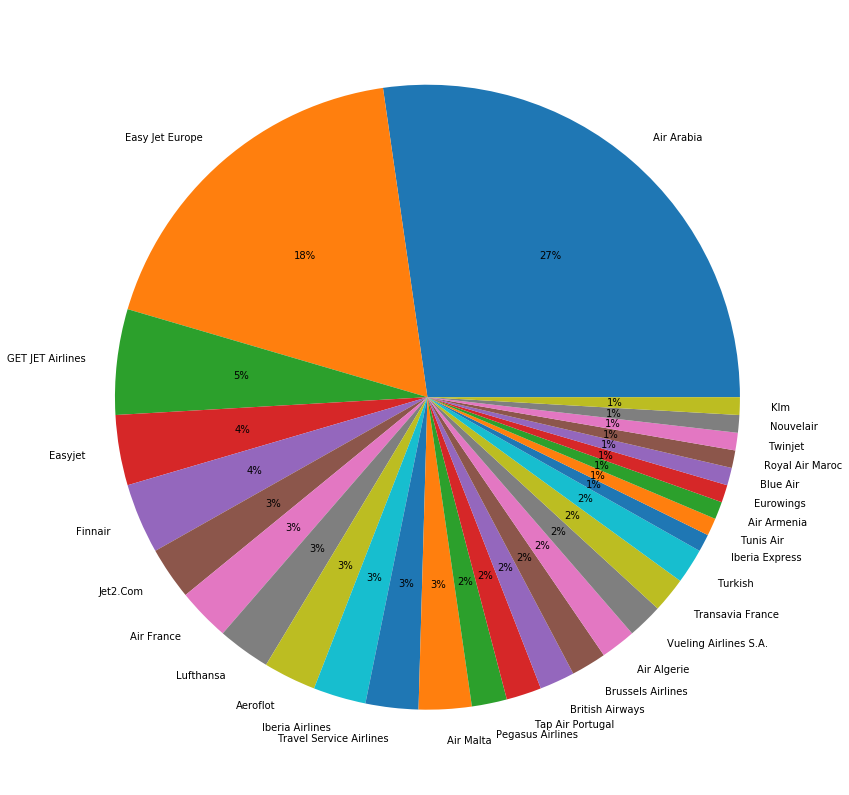

In [10]:
import matplotlib.pyplot as plt


fig_dim=(14,18)
f,ax=plt.subplots(figsize=fig_dim)
quality=flightdata['airlines_airline_name'].unique()
size=flightdata['airlines_airline_name'].value_counts()
plt.pie(size,labels=quality,autopct="%1.0f%%")
plt.show()